 # Classification Loan Status

### Before we start:

If you like my work, please upvote this kernel as it will keep me motivated to do more in the future and share the kernel with others so we can all benefit from it .

### Introduction:
In this kernel ,I will try to show you how different models can improve just by doing simple process on the data .

we are going to work on **binary classification problem**,
where we got some information about sample of peoples , and we need to predict whether we should give some one a loan or not depending on his information .
we actually have a few sample size (614 rows), so we will go with machine learning techniques to solve our problem .

### what you will learn in this kernel ?

* basics of visualizing the data .
* how to compare between **feature importance** (at less in this data) .

   * **feature selection**
   
   * **feature engineer**
   
   
* some simple techniques to **process** the data .
* handling **missing data** .
* how to deal with **categorical** and **numerical** data .
* **outliers** data detection
* but the most important thing that you will learn , is how to **evaluate your model** at every step you take .
    
### what we will use ?

* some important libraries like **sklearn, matplotlib, numpy, pandas, seaborn, scipy**


* fill the values using **backward 'bfill' method** for numerical columns , and **most frequent value** for categorical columns (simple techniques)


* 4 different models to train your data, so we can compare between them 

    **a) logistic regression**
    
    **b) KNeighborsClassifier**
    
    **C) SVC**
    
    **d) DecisionTreeClassifier**
    
    
**Note** : I am writing this kernel while i am still studying and learning about this field , so if there is any mistake i have made, please feel free to tell me in the comment below, and you can ask me any question about this kernel . 

 So let's start


In [1]:
# Importing some important librarys

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('./data/train.csv')
df.columns = map(str.lower, df.columns)
df["gender"] = df["gender"].astype(str)
df["married"] = df["married"].astype(str)
df["dependents"] = df["dependents"].astype(str)
df["education"] = df["education"].astype(str)
df["self_employed"] = df["self_employed"].astype(str)
df["property_area"] = df["property_area"].astype(str)

# simple look on the data

In [3]:
df.shape

(614, 13)

In [4]:
df.head()

# We got some categorical data, and it's a binary classification (Yes, NO)

,loan_id,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
df.info()

# We have missing data , we will handle them as we go

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
loan_id              614 non-null object
gender               614 non-null object
married              614 non-null object
dependents           614 non-null object
education            614 non-null object
self_employed        614 non-null object
applicantincome      614 non-null int64
coapplicantincome    614 non-null float64
loanamount           592 non-null float64
loan_amount_term     600 non-null float64
credit_history       564 non-null float64
property_area        614 non-null object
loan_status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
# Describe the numerical data

df.describe()

,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
# we will change the type of credit_history to object becaues we can see that it is 1 or 0

df['credit_history'] = df['credit_history'].astype('O')

In [8]:
# describe categorical data ("objec")

df.describe(include='O')

,loan_id,gender,married,dependents,education,self_employed,credit_history,property_area,loan_status
count,614,614,614,614,614,614,564.0,614,614
unique,614,3,3,5,2,3,2.0,3,2
top,LP001318,Male,Yes,0,Graduate,No,1.0,Semiurban,Y
freq,1,489,398,345,480,500,475.0,233,422


In [9]:
# we will drop ID because it's not important for our model and it will just mislead the model

df.drop('loan_id', axis=1, inplace=True)

In [10]:
df.head()

,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1,Urban,Y


In [11]:
df.duplicated().any()

# we got no duplicated rows

False

The percentage of Y class : 0.69
The percentage of N class : 0.31


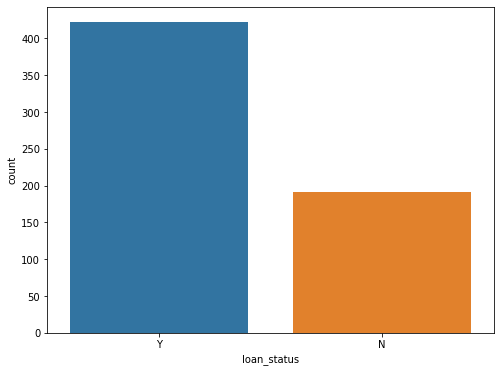

In [12]:
# let's look at the target percentage

plt.figure(figsize=(8,6))
sns.countplot(df['loan_status']);

print('The percentage of Y class : %.2f' % (df['loan_status'].value_counts()[0] / len(df)))
print('The percentage of N class : %.2f' % (df['loan_status'].value_counts()[1] / len(df)))

# We can consider it as imbalanced data, but for now i will not

# let's look deeper in the data

In [13]:
df.columns

Index(['gender', 'married', 'dependents', 'education', 'self_employed',
       'applicantincome', 'coapplicantincome', 'loanamount',
       'loan_amount_term', 'credit_history', 'property_area', 'loan_status'],
      dtype='object')

### first we will go through the categorical features


In [14]:
df.head(1)

,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1,Urban,Y


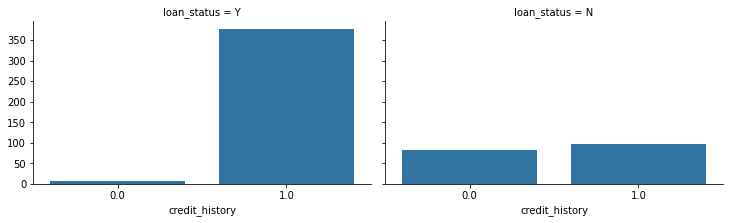

In [15]:
# credit_history

grid = sns.FacetGrid(df,col='loan_status', size=3.2, aspect=1.6)
grid.map(sns.countplot, 'credit_history');

# we didn't give a loan for most people who got Credit History = 0
# but we did give a loan for most of people who got Credit History = 1
# so we can say if you got Credit History = 1 , you will have better chance to get a loan

# important feature

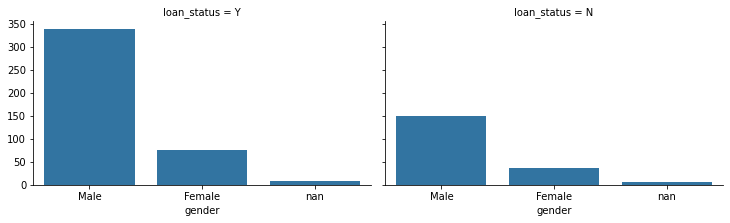

In [16]:
# gender

grid = sns.FacetGrid(df,col='loan_status', size=3.2, aspect=1.6)
grid.map(sns.countplot, 'gender');

# most males got loan and most females got one too so (No pattern)

# i think it's not so important feature, we will see later

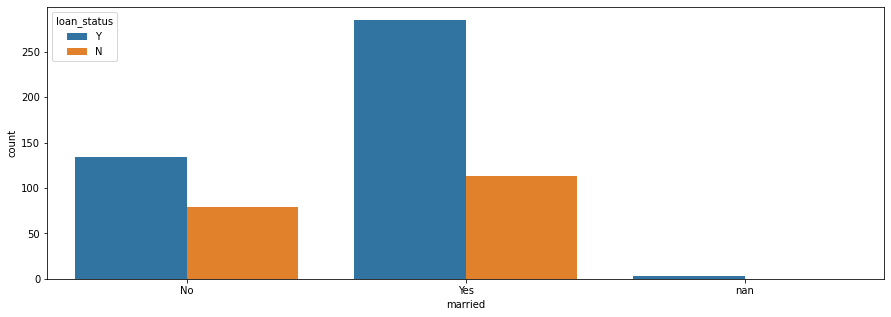

In [17]:
# married
plt.figure(figsize=(15,5))
sns.countplot(x='married', hue='loan_status', data=df);

# most people who get married did get a loan
# if you'r married then you have better chance to get a loan :)
# good feature

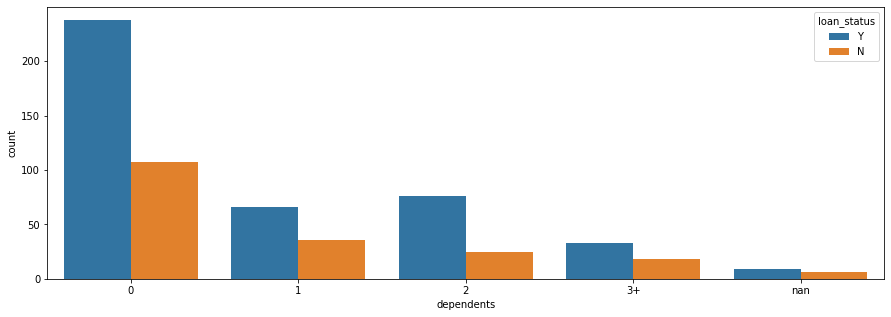

In [18]:
# dependents

plt.figure(figsize=(15,5))
sns.countplot(x='dependents', hue='loan_status', data=df);

# first if dependents = 0 , we got higher chance to get a loan ((very hight chance))
# good feature

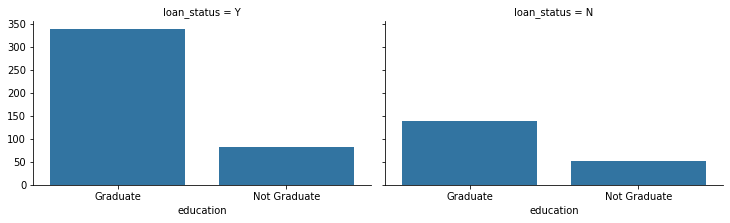

In [19]:
# education

grid = sns.FacetGrid(df,col='loan_status', size=3.2, aspect=1.6)
grid.map(sns.countplot, 'education');

# If you are graduated or not, you will get almost the same chance to get a loan (No pattern)
# Here you can see that most people did graduated, and most of them got a loan
# on the other hand, most of people who did't graduate also got a loan, but with less percentage from people who graduated

# not important feature

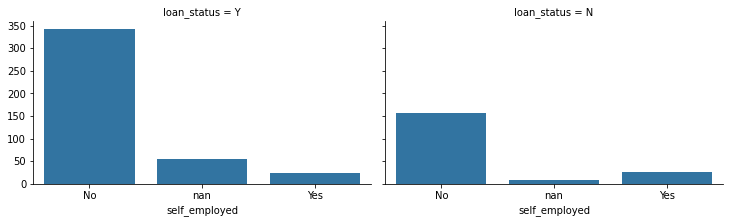

In [20]:
# self_employed

grid = sns.FacetGrid(df,col='loan_status', size=3.2, aspect=1.6)
grid.map(sns.countplot, 'self_employed');

# No pattern (same as education)

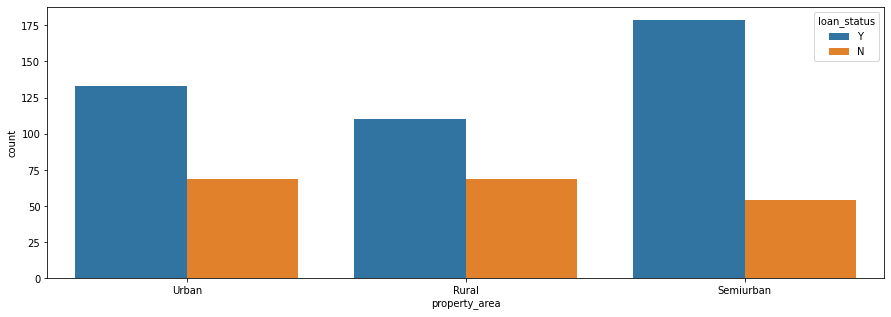

In [21]:
# property_area

plt.figure(figsize=(15,5))
sns.countplot(x='property_area', hue='loan_status', data=df);

# We can say, Semiurban property_area got more than 50% chance to get a loan

# good feature

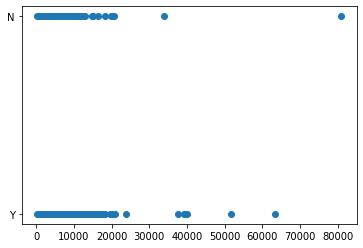

In [22]:
# applicantincome

plt.scatter(df['applicantincome'], df['loan_status']);

# No pattern

In [23]:
# the numerical data

df.groupby('loan_status').median() # median because Not affected with outliers

# we can see that when we got low median in CoapplicantInocme we got loan_status = N

# CoapplicantInocme is a good feature

,applicantincome,coapplicantincome,loanamount,loan_amount_term
loan_status,,,,
N,3833.5,268.0,129.0,360.0
Y,3812.5,1239.5,126.0,360.0


# Simple process for the data

### Missing values

here i am just going to use a simple techniques to handle the missing data

In [24]:
df.isnull().sum().sort_values(ascending=False)

credit_history       50
loanamount           22
loan_amount_term     14
loan_status           0
property_area         0
coapplicantincome     0
applicantincome       0
self_employed         0
education             0
dependents            0
married               0
gender                0
dtype: int64

In [25]:
# We will separate the numerical columns from the categorical

cat_data = []
num_data = []

for i,c in enumerate(df.dtypes):
    if c == object:
        cat_data.append(df.iloc[:, i])
    else :
        num_data.append(df.iloc[:, i])

In [26]:
cat_data = pd.DataFrame(cat_data).transpose()
num_data = pd.DataFrame(num_data).transpose()

In [27]:
import numpy as np

from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_openml
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV

In [28]:
from sklearn.preprocessing import LabelEncoder  
le = LabelEncoder()
cat_data.head()
# transform the target column

target_values = {'Y': 0 , 'N' : 1}

target = cat_data['loan_status']
cat_data.drop('loan_status', axis=1, inplace=True)

target = target.map(target_values)
cat_data.head()

,gender,married,dependents,education,self_employed,credit_history,property_area
0,Male,No,0,Graduate,No,1,Urban
1,Male,Yes,1,Graduate,No,1,Rural
2,Male,Yes,0,Graduate,Yes,1,Urban
3,Male,Yes,0,Not Graduate,No,1,Urban
4,Male,No,0,Graduate,No,1,Urban


In [29]:
numeric_features = num_data.columns
categorical_features = cat_data.columns

In [30]:
#numeric_features = ['age', 'fare']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

#categorical_features = ['embarked', 'sex', 'pclass']
categorical_transformer = Pipeline(steps=[
    #('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

In [31]:
# cat_dataaaa
# If you want to fill every column with its own most frequent value you can use

cat_data = cat_data.apply(lambda x:x.fillna(x.value_counts().index[0]))
cat_data.isnull().sum().any() # no more missing data 

False

In [32]:
# num_data
# fill every missing value with their previous value in the same column

num_data.fillna(method='bfill', inplace=True)
num_data.isnull().sum().any() # no more missing data 

False

### categorical columns

* we are going to use **LabelEncoder** :

    what it is actually do it encode labels with value between 0 and n_classes-1 , [for more examples](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) .

# Train the data

* we will stop here for know and train the data.

    we are going to use **StratifiedShuffleSplit**, for more [information](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html) .

In [33]:
X = pd.concat([cat_data, num_data], axis=1)
y = target 

In [34]:
# we will use StratifiedShuffleSplit to split the data Taking into consideration that we will get the same ratio on the target column

from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train, test in sss.split(X, y):
    X_train, X_test = X.iloc[train], X.iloc[test]
    y_train, y_test = y.iloc[train], y.iloc[test]
    
print('X_train shape', X_train.shape)
print('y_train shape', y_train.shape)
print('X_test shape', X_test.shape)
print('y_test shape', y_test.shape)

# almost same ratio
print('\nratio of target in y_train :',y_train.value_counts().values/ len(y_train))
print('ratio of target in y_test :',y_test.value_counts().values/ len(y_test))
print('ratio of target in original_data :',df['loan_status'].value_counts().values/ len(df))

X_train shape (491, 11)
y_train shape (491,)
X_test shape (123, 11)
y_test shape (123,)

ratio of target in y_train : [0.68635438 0.31364562]
ratio of target in y_test : [0.69105691 0.30894309]
ratio of target in original_data : [0.68729642 0.31270358]


In [35]:
X_train.head()

,gender,married,dependents,education,self_employed,credit_history,property_area,applicantincome,coapplicantincome,loanamount,loan_amount_term
415,Female,No,0,Graduate,No,1.0,Urban,2995.0,0.0,60.0,360.0
26,Male,Yes,0,Graduate,No,1.0,Semiurban,2799.0,2253.0,122.0,360.0
394,Male,Yes,2,Graduate,No,1.0,Urban,3100.0,1400.0,113.0,360.0
584,Male,Yes,1,Graduate,No,0.0,Rural,2787.0,1917.0,146.0,360.0
86,Male,Yes,2,Not Graduate,No,1.0,Semiurban,3333.0,2000.0,99.0,360.0


In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier


def create_pipeline(clf):
    return Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', clf)])

models = {
    'LogisticRegression': create_pipeline(LogisticRegression(random_state=42)),
    'KNeighborsClassifier': create_pipeline(KNeighborsClassifier()),
    'SVC': create_pipeline(SVC(random_state=42)),
    'DecisionTreeClassifier': create_pipeline(DecisionTreeClassifier(max_depth=1, random_state=42))
}
    

# build functions

### we are going to build 3 functions :
1) **loss** : to evaluate our models
* [precision](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html)
* [recall](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html)
* [f1](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html)
* [log_loss](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.log_loss.html)
* [accuracy_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)

2) **train_eval_train** : to evaluate our models in the same data that we train it on .

3) **train_eval_cross** : to evaluate our models using different data that we train the model on .
* [StratifiedKFold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html)

### so you may ask why we don't just train our model and evaluate it without building this functions ?

actually you can do that,but mostly your model will not work good at beginning, so you need to change something about your data to improve your accuracy ,
by changing i mean **data processing**, and every step you will make, you should **evaluate your model** to see if it is improving or not, so to not do this step every time, this functions will make life easy as you go :)


In [58]:
# loss

from sklearn.metrics import precision_score, recall_score, f1_score, log_loss, accuracy_score

def loss(y_true, y_pred, retu=False):
    pre = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    loss = log_loss(y_true, y_pred)
    acc = accuracy_score(y_true, y_pred)
    
    if retu:
        return pre, rec, f1, loss, acc
    else:
        print('  pre: %.3f\n  rec: %.3f\n  f1: %.3f\n  loss: %.3f\n  acc: %.3f' % (pre, rec, f1, loss, acc))

In [38]:
# train_eval_train

def train_eval_train(models, X, y):
    for name, model in models.items():
        print(name,':')
        model.fit(X, y)
        loss(y, model.predict(X))
        print('-'*30)
        
train_eval_train(models, X_train, y_train)

# we can see that best model is LogisticRegression at least for now, SVC is just memorizing the data so it is overfitting .

LogisticRegression :
  pre: 0.930
  rec: 0.429
  f1: 0.587
  loss: 6.542
  acc: 0.811
------------------------------
KNeighborsClassifier :
  pre: 0.887
  rec: 0.461
  f1: 0.607
  loss: 6.472
  acc: 0.813
------------------------------
SVC :
  pre: 0.960
  rec: 0.468
  f1: 0.629
  loss: 5.979
  acc: 0.827
------------------------------
DecisionTreeClassifier :
  pre: 0.929
  rec: 0.422
  f1: 0.580
  loss: 6.612
  acc: 0.809
------------------------------


In [39]:
X_train.shape

(491, 11)

In [ ]:
# train_eval_cross
# in the next cell i will be explaining this function

from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)

def train_eval_cross(models, X, y, folds):
    # we will change X & y to dataframe because we will use iloc (iloc don't work on numpy array)
    X = pd.DataFrame(X) 
    y = pd.DataFrame(y)
    idx = [' pre', ' rec', ' f1', ' loss', ' acc']
    for name, model in models.items():
        ls = []
        print(name,':')

        for train, test in folds.split(X, y):
            model.fit(X.iloc[train], y.iloc[train]) 
            y_pred = model.predict(X.iloc[test]) 
            ls.append(loss(y.iloc[test], y_pred, retu=True))
        print(pd.DataFrame(np.array(ls).mean(axis=0), index=idx)[0])  #[0] because we don't want to show the name of the column
        print('-'*30)
        
train_eval_cross(models, X_train, y_train, skf)

# ohhh, as i said SVC is just memorizing the data, and you can see that here DecisionTreeClassifier is better than LogisticRegression 

In [ ]:
# some explanation of the above function

x = []
idx = [' pre', ' rec', ' f1', ' loss', ' acc']

# we will use one model
log = LogisticRegression()

for train, test in skf.split(X_train, y_train):
    log.fit(X_train.iloc[train], y_train.iloc[train])
    ls = loss(y_train.iloc[test], log.predict(X_train.iloc[test]), retu=True)
    x.append(ls)
    
# thats what we get
pd.DataFrame(x, columns=idx)

# (column 0 represent the precision_score of the 10 folds)
# (row 0 represent the (pre, rec, f1, loss, acc) for the first fold)
# then we should find the mean of every column
# pd.DataFrame(x, columns=idx).mean(axis=0)

# Let's start to improve our model

# features engineer

In [ ]:
# ooh, we got it right for most of the features, as you can see we've say at the first of the kernel ,
# that Credit_Histroy and married etc, are good features, actually Credit_Histroy is the best .

data_corr = pd.concat([X_train, y_train], axis=1)
corr = data_corr.corr()
plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True);

# here we got 58% similarity between loanamount & applicantincome 
# and that may be bad for our model so we will see what we can do

In [ ]:
X_train.head()

In [ ]:
# I will try to make some operations on some features, here I just tried diffrent operations on diffrent features,
# having experience in the field, and having knowledge about the data will also help

X_train['new_col'] = X_train['CoapplicantIncome'] / X_train['applicantincome']  
X_train['new_col_2'] = X_train['loanamount'] * X_train['loan_amount_term'] 

In [ ]:
data_corr = pd.concat([X_train, y_train], axis=1)
corr = data_corr.corr()
plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True);

# new_col 0.03 , new_col_2, 0.047
# not that much , but that will help us reduce the number of features

In [ ]:
X_train.drop(['CoapplicantIncome', 'applicantincome', 'loan_amount_term', 'loanamount'], axis=1, inplace=True)

In [ ]:
train_eval_cross(models, X_train, y_train, skf)

# ok, SVC is improving, but LogisticRegression is overfitting
# i wan't change nothing so we can see what will happen as we go

In [ ]:
# first lets take a look at the value counts of every label

for i in range(X_train.shape[1]):
    print(X_train.iloc[:,i].value_counts(), end='\n------------------------------------------------\n')

### we will work on the features that have varied values

In [ ]:
# new_col_2

# we can see we got right_skewed
# we can solve this problem with very simple statistical teqniq , by taking the logarithm of all the values
# because when data is normally distributed that will help improving our model

from scipy.stats import norm

fig, ax = plt.subplots(1,2,figsize=(20,5))

sns.distplot(X_train['new_col_2'], ax=ax[0], fit=norm)
ax[0].set_title('new_col_2 before log')

X_train['new_col_2'] = np.log(X_train['new_col_2'])  # logarithm of all the values

sns.distplot(X_train['new_col_2'], ax=ax[1], fit=norm)
ax[1].set_title('new_col_2 after log');

In [ ]:
# now we will evaluate our models, and i will do that continuously ,so i don't need to mention that every time

train_eval_cross(models, X_train, y_train, skf)

# wooow our models improved really good by just doing the previous step .

In [ ]:
# new_col

# most of our data is 0 , so we will try to change other values to 1

print('before:')
print(X_train['new_col'].value_counts())

X_train['new_col'] = [x if x==0 else 1 for x in X_train['new_col']]
print('-'*50)
print('\nafter:')
print(X_train['new_col'].value_counts())

In [ ]:
train_eval_cross(models, X_train, y_train, skf)

# ok we are improving our models as we go 

In [ ]:
for i in range(X_train.shape[1]):
    print(X_train.iloc[:,i].value_counts(), end='\n------------------------------------------------\n')
    
# looks better

# Outliers

#### there is different techniques to handle outliers, here we are going to use [**IQR**](https://www.youtube.com/watch?v=qLYYHWYr8xI)

In [ ]:
# we will use boxplot to detect outliers

sns.boxplot(X_train['new_col_2']);
plt.title('new_col_2 outliers', fontsize=15);
plt.xlabel('');

In [ ]:
threshold = 0.1  # this number is hyper parameter , as much as you reduce it, as much as you remove more points
                 # you can just try different values the deafult value is (1.5) it works good for most cases
                 # but be careful, you don't want to try a small number because you may loss some important information from the data .
                 # that's why I was surprised when 0.1 gived me the best result
            
new_col_2_out = X_train['new_col_2']
q25, q75 = np.percentile(new_col_2_out, 25), np.percentile(new_col_2_out, 75) # Q25, Q75
print('Quartile 25: {} , Quartile 75: {}'.format(q25, q75))

iqr = q75 - q25
print('iqr: {}'.format(iqr))

cut = iqr * threshold
lower, upper = q25 - cut, q75 + cut
print('Cut Off: {}'.format(cut))
print('Lower: {}'.format(lower))
print('Upper: {}'.format(upper))

outliers = [x for x in new_col_2_out if x < lower or x > upper]
print('Nubers of Outliers: {}'.format(len(outliers)))
print('outliers:{}'.format(outliers))

data_outliers = pd.concat([X_train, y_train], axis=1)
print('\nlen X_train before dropping the outliers', len(data_outliers))
data_outliers = data_outliers.drop(data_outliers[(data_outliers['new_col_2'] > upper) | (data_outliers['new_col_2'] < lower)].index)

print('len X_train before dropping the outliers', len(data_outliers))

In [ ]:
X_train = data_outliers.drop('loan_status', axis=1)
y_train = data_outliers['loan_status']

In [ ]:
sns.boxplot(X_train['new_col_2']);
plt.title('new_col_2 without outliers', fontsize=15);
plt.xlabel('');

# good :)

In [ ]:
train_eval_cross(models, X_train, y_train, skf)

# know we got 94.1 for precision & 53.5 for recall

# features selection

In [ ]:
# self_employed got really bad corr (-0.00061) , let's try remove it and see what will happen

data_corr = pd.concat([X_train, y_train], axis=1)
corr = data_corr.corr()
plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True);

In [ ]:
#X_train.drop(['self_employed'], axis=1, inplace=True)

train_eval_cross(models, X_train, y_train, skf)

# looks like self_employed is not important
# KNeighborsClassifier improved

# droping all the features Except for credit_history actually improved KNeighborsClassifier and didn't change anything in other models
# so you can try it by you self
# but don't forget to do that on testing data too

#X_train.drop(['self_employed','dependents', 'new_col_2', 'education', 'gender', 'property_area','married', 'new_col'], axis=1, inplace=True)

In [ ]:
data_corr = pd.concat([X_train, y_train], axis=1)
corr = data_corr.corr()
plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True);

# evaluate the models on Test_data

here we will just repeat what we did in training data

In [ ]:
X_test.head()

In [ ]:
X_test_new = X_test.copy()

In [ ]:
x = []

X_test_new['new_col'] = X_test_new['CoapplicantIncome'] / X_test_new['applicantincome']  
X_test_new['new_col_2'] = X_test_new['loanamount'] * X_test_new['loan_amount_term']
X_test_new.drop(['CoapplicantIncome', 'applicantincome', 'loan_amount_term', 'loanamount'], axis=1, inplace=True)

X_test_new['new_col_2'] = np.log(X_test_new['new_col_2'])

X_test_new['new_col'] = [x if x==0 else 1 for x in X_test_new['new_col']]

#X_test_new.drop(['self_employed'], axis=1, inplace=True)

# drop all the features Except for credit_history
#X_test_new.drop(['self_employed','dependents', 'new_col_2', 'education', 'gender', 'property_area','married', 'new_col'], axis=1, inplace=True)

In [ ]:
X_test_new.head()

In [ ]:
X_train.head()

In [ ]:
for name,model in models.items():
    print(name, end=':\n')
    loss(y_test, model.predict(X_test_new))
    print('-'*40)

**Conclusion:**

what ever we do, our **recall score** will not improving , maybe because we don't have a good amount of data, so I think if we got **more data** and we try more **complex models** our accuracy will improve,I am not sure about this, so please if I made any mistakes in this kernel , or if you have any suggestions which can improve the accuracy please feel free to share it with us in the comments .

Thanks :)

In [40]:
pipe_svc = models['LogisticRegression']

In [41]:
from skl2onnx import convert_sklearn
from skl2onnx.common.data_types import FloatTensorType, Int64TensorType

In [42]:
import numpy

In [43]:
from skl2onnx.common.data_types import FloatTensorType, StringTensorType, Int64TensorType

def convert_dataframe_schema(df, drop=None):
    inputs = []
    for k, v in zip(df.columns, df.dtypes):
        if drop is not None and k in drop:
            continue
        if v == 'int64':
            t = Int64TensorType([None, 1])
        elif v == 'float64':
            t = FloatTensorType([None, 1])
        else:
            t = StringTensorType([None, 1])
        inputs.append((k, t))
    return inputs

inputs = convert_dataframe_schema(X_train)


In [44]:
X_train.dtypes

gender                object
married               object
dependents            object
education             object
self_employed         object
credit_history       float64
property_area         object
applicantincome      float64
coapplicantincome    float64
loanamount           float64
loan_amount_term     float64
dtype: object

In [45]:
categorical_features

Index(['gender', 'married', 'dependents', 'education', 'self_employed',
       'credit_history', 'property_area'],
      dtype='object')

In [46]:
numeric_features

Index(['applicantincome', 'coapplicantincome', 'loanamount',
       'loan_amount_term'],
      dtype='object')

In [47]:
inputs

[('gender', StringTensorType(shape=[None, 1])),
 ('married', StringTensorType(shape=[None, 1])),
 ('dependents', StringTensorType(shape=[None, 1])),
 ('education', StringTensorType(shape=[None, 1])),
 ('self_employed', StringTensorType(shape=[None, 1])),
 ('credit_history', FloatTensorType(shape=[None, 1])),
 ('property_area', StringTensorType(shape=[None, 1])),
 ('applicantincome', FloatTensorType(shape=[None, 1])),
 ('coapplicantincome', FloatTensorType(shape=[None, 1])),
 ('loanamount', FloatTensorType(shape=[None, 1])),
 ('loan_amount_term', FloatTensorType(shape=[None, 1]))]

In [48]:
X_test.head()

,gender,married,dependents,education,self_employed,credit_history,property_area,applicantincome,coapplicantincome,loanamount,loan_amount_term
182,Male,Yes,0,Graduate,No,1.0,Semiurban,4600.0,0.0,73.0,180.0
440,Male,No,0,Graduate,No,1.0,Semiurban,3660.0,5064.0,187.0,360.0
276,Male,Yes,0,Graduate,No,1.0,Semiurban,3993.0,3274.0,207.0,360.0
533,Male,No,1,Graduate,No,1.0,Semiurban,11250.0,0.0,196.0,360.0
504,Male,Yes,0,Not Graduate,No,1.0,Semiurban,3814.0,1483.0,124.0,300.0


In [49]:
model_onnx = convert_sklearn(pipe_svc, initial_types=inputs)
with open("test.onnx", "wb") as f:
    f.write(model_onnx.SerializeToString())

In [50]:
X_test.dtypes

gender                object
married               object
dependents            object
education             object
self_employed         object
credit_history       float64
property_area         object
applicantincome      float64
coapplicantincome    float64
loanamount           float64
loan_amount_term     float64
dtype: object

In [51]:
input_data = {c: X_test[c].values for c in X_test.columns}
for c in numeric_features:
    input_data[c] = input_data[c].astype(np.float32)
for k in input_data:
    input_data[k] = input_data[k].reshape((input_data[k].shape[0], 1))

In [52]:
X_train.dtypes

gender                object
married               object
dependents            object
education             object
self_employed         object
credit_history       float64
property_area         object
applicantincome      float64
coapplicantincome    float64
loanamount           float64
loan_amount_term     float64
dtype: object

In [53]:
X_train.head()

,gender,married,dependents,education,self_employed,credit_history,property_area,applicantincome,coapplicantincome,loanamount,loan_amount_term
415,Female,No,0,Graduate,No,1.0,Urban,2995.0,0.0,60.0,360.0
26,Male,Yes,0,Graduate,No,1.0,Semiurban,2799.0,2253.0,122.0,360.0
394,Male,Yes,2,Graduate,No,1.0,Urban,3100.0,1400.0,113.0,360.0
584,Male,Yes,1,Graduate,No,0.0,Rural,2787.0,1917.0,146.0,360.0
86,Male,Yes,2,Not Graduate,No,1.0,Semiurban,3333.0,2000.0,99.0,360.0


In [54]:
import onnx

In [55]:
categorical_features

Index(['gender', 'married', 'dependents', 'education', 'self_employed',
       'credit_history', 'property_area'],
      dtype='object')

In [56]:
numeric_features

Index(['applicantincome', 'coapplicantincome', 'loanamount',
       'loan_amount_term'],
      dtype='object')

In [57]:
import onnxruntime as rt
import numpy
sess = rt.InferenceSession("test.onnx")
pred_onx = sess.run(None, input_data)

InvalidArgument: [ONNXRuntimeError] : 2 : INVALID_ARGUMENT : Unexpected input data type. Actual: (N11onnxruntime17PrimitiveDataTypeIdEE) , expected: (N11onnxruntime17PrimitiveDataTypeIfEE)

In [ ]:
input_data